In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import joblib
from astropy.table import Table

In [3]:
fname_template2023 = '../bfoscE9G10/template/template_from_202305220046.dump'
Tdata2023 = joblib.load(fname_template2023)
fname_template = '../bfoscE9G10/template/fear_model_order2_12.dump'

Tdata = joblib.load(fname_template)

In [4]:
fname = '/Users/lijiao/Documents/works/Feige89/data/216cm/20240314_bfosc_liuzhicun/E9G10/dump/lamp-202403140107_SPECSLAMP_FeAr_slit16s_G10_E9.fit_for_202403140104_SPECSTARGET_Feige89_slit16s_G10_E9.fit.z'

data = joblib.load(fname)

In [5]:
tab_linelist =  Table.read('../arc_linelist/FeAr.dat', format='ascii')

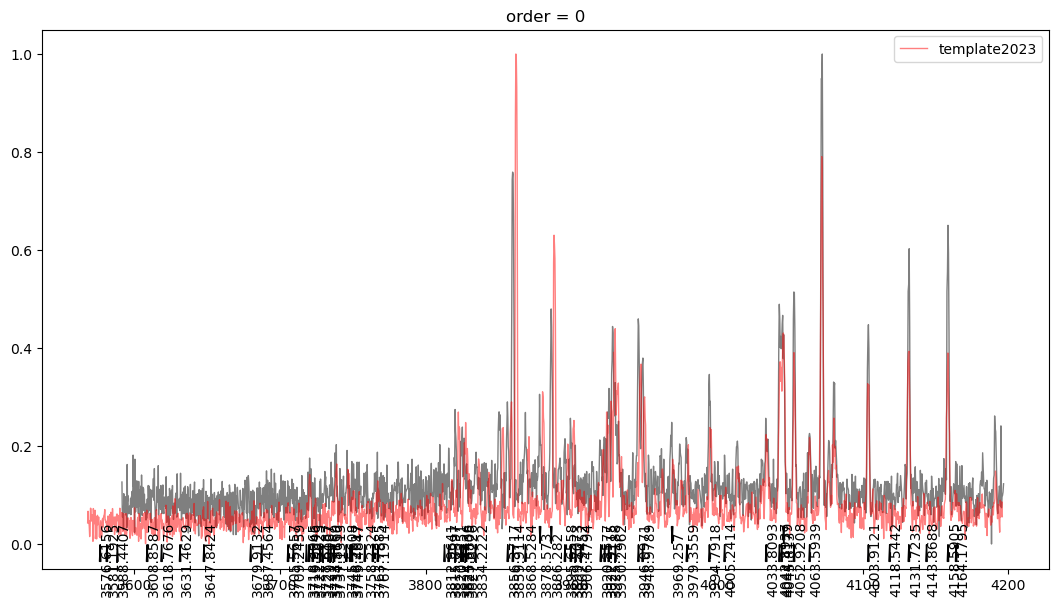

In [6]:
#%matplotlib qt


for order in np.arange(11)[0:1]:
    fig, ax = plt.subplots(1,1, figsize=(13, 7))
    plt.title(f'order = {order}')
    x = data['flux_arc'][order]
    wv = data['wave_solu'][order]
    plt.plot(wv, (x- np.min(x))/(np.max(x) - np.min(x)), color='k', lw=1, alpha=0.5)
    x = Tdata['flux'][order]
    #x[x>4000] = np.nan
    wv = Tdata['wave'][order]
    #plt.plot(wv, (x- np.nanmin(x))/(np.nanmax(x) - np.nanmin(x)),  color='b', lw=1, alpha=0.5, label='template')
    _ind = (np.min(wv) <= tab_linelist['wavelength']) &  (tab_linelist['wavelength'] <= np.max(wv))
    _linelist = tab_linelist[_ind]['wavelength'].value
    for _line in _linelist:
        ax.annotate(f'{_line}', xy=(_line, 0), xytext=(_line, -0.1), rotation=90,
                     arrowprops=dict(facecolor='b', shrink=0.05, width=1, headwidth=1),)
    wv = Tdata2023['wave'][order]
    x = Tdata2023['flux'][order]
    plt.plot(wv, (x- np.nanmin(x))/(np.nanmax(x) - np.nanmin(x)),  color='r', lw=1, alpha=0.5, label='template2023')
    plt.legend()
plt.show()

In [7]:
_line = 3000
plt.Annotation(f'{_line}', xy=(_line, 0), xytext=(_line, 0),
                     arrowprops=dict(facecolor='b', shrink=0.05),)

Text(3000, 0, '3000')

In [8]:
np.max(Tdata['flux'][order])

228.5517

In [9]:
#data['wave_init'] = Tdata['wave']
#data['wave_solu'] = Tdata['wave']
#joblib.dump(data, fname)

# make E9G10 template

In [117]:
data_template = {'wave' : data['wave_solu'],
                 'flux' : data['flux_arc'],
                 'linelist' : Tdata['linelist']
                }

joblib.dump(data_template, '../bfoscE9G10/template/fear_model_order2_12_from202403140107.dump')

['../bfoscE9G10/template/fear_model_order2_12_from202403140107.dump']